# Logistic regression

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

%matplotlib inline

np.random.seed(42)

In [2]:
X_train = pd.read_csv('./data/cleaned_X_train.csv')
y_train = pd.read_csv('./data/cleaned_y_train.csv')

X_train.drop("Unnamed: 0", axis=1, inplace=True)
y_train.drop("Unnamed: 0", axis=1, inplace=True)

X_train.shape, y_train.shape

((7668, 19), (7668, 1))

In [5]:
log_reg =  LogisticRegression(random_state=42, n_jobs=-1)

## Random parameter search

In [6]:
penalty = ['l1', 'l2', 'elasticnet', None]
dual = [True, False]
C = [0.001,0.01,0.1,1,10,100,1000]
solver = ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']

random_grid = {
    "penalty":penalty,
    "dual":dual,
    "C":C,
    "solver":solver
}

In [7]:
log_reg_random = RandomizedSearchCV(estimator=log_reg, param_distributions=random_grid, n_iter=100, cv=5, verbose=0, random_state=42, n_jobs=-1)
log_reg_random.fit(X_train, y_train)

c:\Users\Arne\anaconda3\envs\ml_proj\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
345 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Arne\anaconda3\envs\ml_proj\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Arne\anaconda3\envs\ml_proj\lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\Arne\anaconda3\envs\ml_proj\lib\site-packages\sklearn\linear_model\_logistic.py", line 1169, in fit
    solver = _

RandomizedSearchCV(cv=5,
                   estimator=LogisticRegression(n_jobs=-1, random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'C': [0.001, 0.01, 0.1, 1, 10, 100,
                                              1000],
                                        'dual': [True, False],
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    None],
                                        'solver': ['lbfgs', 'liblinear',
                                                   'newton-cg',
                                                   'newton-cholesky', 'sag',
                                                   'saga']},
                   random_state=42)

In [8]:
log_reg_random.best_params_

{'solver': 'liblinear', 'penalty': 'l1', 'dual': False, 'C': 100}

In [18]:
out = pd.DataFrame(log_reg_random.cv_results_)
out["param_penalty"] = out["param_penalty"].fillna('None')

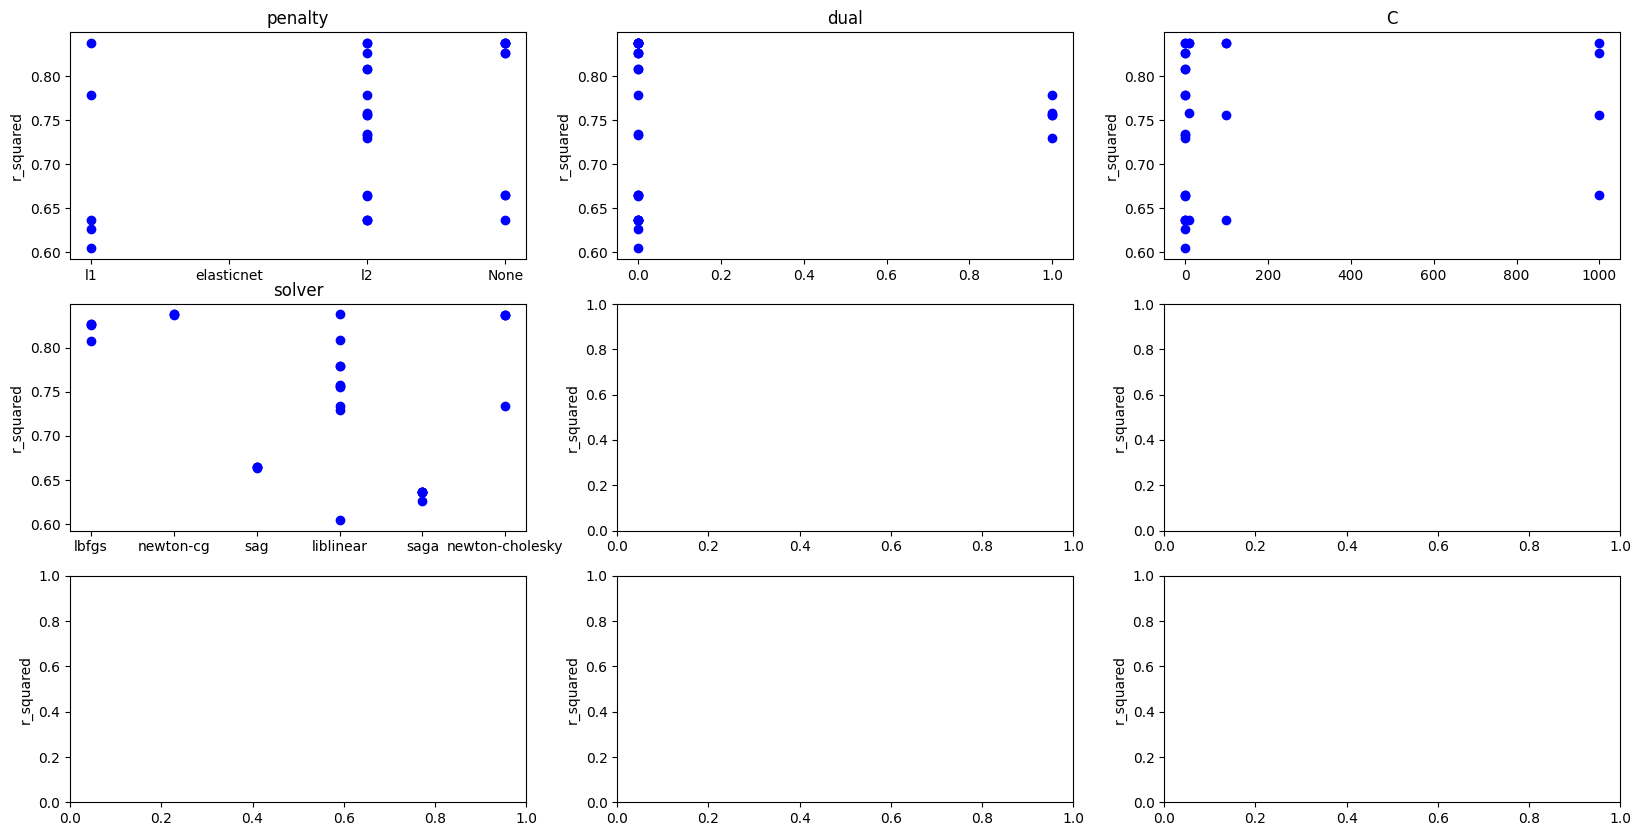

In [17]:
xlabel_names = ["param_penalty","param_dual","param_C","param_solver"]
fig, axs = plt.subplots(3,3, figsize=(20,10))

axs[0,0].scatter(out['param_penalty'], out['mean_test_score'], c='blue');
axs[0,0].set_title('penalty')

axs[0,1].scatter(out['param_dual'], out['mean_test_score'], c='blue');
axs[0,1].set_title('dual')

axs[0,2].scatter(out['param_C'], out['mean_test_score'], c='blue');
axs[0,2].set_title('C')

axs[1,0].scatter(out['param_solver'], out['mean_test_score'], c='blue');
axs[1,0].set_title('solver')

for ax in axs.flat:
    ax.set(ylabel='r_squared')

## Grid search

In [23]:
param_grid = {
    "penalty":["l1", "l2", None],
    "dual":[False],
    "C":[0, 0.1, 0.001, 5, 10, 15, 50, 100],
    "solver":["liblinear", "newton-cg","newton-cholesky"]
}

In [24]:
log_reg_grid = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv= 5, verbose=0, n_jobs=-1)
log_reg_grid.fit(X_train, y_train)
best_params = log_reg_grid.best_params_

c:\Users\Arne\anaconda3\envs\ml_proj\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
150 fits failed out of a total of 360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Arne\anaconda3\envs\ml_proj\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Arne\anaconda3\envs\ml_proj\lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\Arne\anaconda3\envs\ml_proj\lib\site-packages\sklearn\base.py", line 638, in _validate_params
    validate_parameter_constraints(
 

In [25]:
best_params

{'C': 15, 'dual': False, 'penalty': 'l2', 'solver': 'liblinear'}

In [26]:
log_reg_best = log_reg_grid.best_estimator_

In [27]:
print(f"Train score: {log_reg_best.score(X_train, y_train)}")

Train score: 0.8479394887845592


# Saving model

In [28]:
from joblib import dump
dump(log_reg_best, "./models/log_reg_best.joblib")

['./models/log_reg_best.joblib']